## Analyzing Cryptocurrencies in Python


In [1]:
import datetime as dt
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import seaborn as sns
import mplfinance as mpf
import klib
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

from bs4 import BeautifulSoup as bs
import requests

In [2]:
currency = "USD"
metric = "Close"



In [3]:
start = dt.datetime(2021, 1, 1)
end = dt.datetime.now()

In [4]:
cryptos=["BTC","ETC","SOL","USDT","BNB","USDC","ADA","XRP","DOT"] # bitcoin, ethereum, solana
colnames = []

In [5]:
combined = pd.DataFrame() # empty dataframe

for crypto in cryptos:
    df = pdr.DataReader(f"{crypto}-{currency}", 'yahoo', start, end)
    df=df[metric] # select only the metric
    colnames.append(f"{crypto}-{currency}") # add the name of the crypto to the column names
    combined[colnames[-1]] = df
    

In [6]:
combined.head() # check the dataframe

,BTC-USD,ETC-USD,SOL-USD,USDT-USD,BNB-USD,USDC-USD,ADA-USD,XRP-USD,DOT-USD
Date,,,,,,,,,
2020-12-31,29001.720703,5.677589,1.510898,1.000598,37.376034,0.999807,0.181397,0.219846,9.292508
2021-01-01,29374.152344,5.704348,1.842084,1.001916,37.905010,0.999823,0.175350,0.237444,8.306819
2021-01-02,32127.267578,5.782465,1.799275,1.000600,38.241592,1.000162,0.177423,0.221655,9.208837
2021-01-03,32782.023438,6.557408,2.161752,1.000514,41.148979,0.999736,0.204995,0.225848,10.033283
2021-01-04,31971.914062,7.014788,2.485097,1.000128,40.926353,0.999372,0.224762,0.236677,9.469611


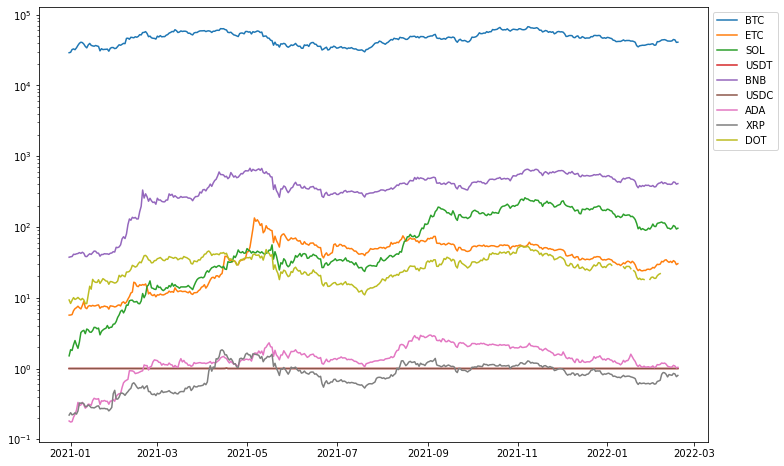

In [7]:
plt.figure(figsize=(12,8))

plt.yscale("log") # log scale

for crypto in cryptos:
    plt.plot(combined[f"{crypto}-{currency}"], label=crypto)
    
# Legend outside of the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show();


In [8]:
klib.corr_mat(combined) # default representation of a correlation matrix

,BTC-USD,ETC-USD,SOL-USD,USDT-USD,BNB-USD,USDC-USD,ADA-USD,XRP-USD,DOT-USD
BTC-USD,1.00,0.13,0.45,0.01,0.59,0.10,0.42,0.55,0.92
ETC-USD,0.13,1.00,0.33,-0.16,0.62,-0.06,0.74,0.73,0.23
SOL-USD,0.45,0.33,1.00,-0.13,0.70,-0.16,0.56,0.44,0.50
USDT-USD,0.01,-0.16,-0.13,1.00,-0.12,0.76,-0.12,-0.05,0.03
BNB-USD,0.59,0.62,0.70,-0.12,1.00,-0.00,0.64,0.83,0.63
USDC-USD,0.10,-0.06,-0.16,0.76,-0.00,1.00,-0.01,0.07,0.12
ADA-USD,0.42,0.74,0.56,-0.12,0.64,-0.01,1.00,0.73,0.50
XRP-USD,0.55,0.73,0.44,-0.05,0.83,0.07,0.73,1.00,0.61
DOT-USD,0.92,0.23,0.50,0.03,0.63,0.12,0.50,0.61,1.00


Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

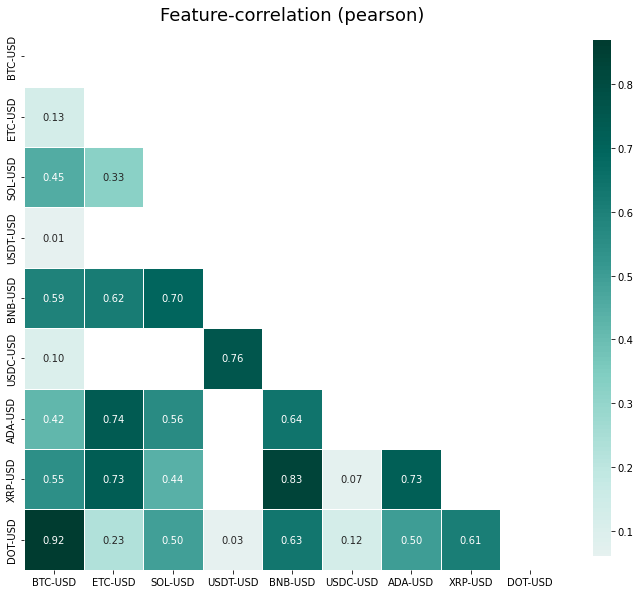

In [9]:
klib.corr_plot(combined, split='pos') # displaying only positive correlations, other settings include threshold, cmap...


Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

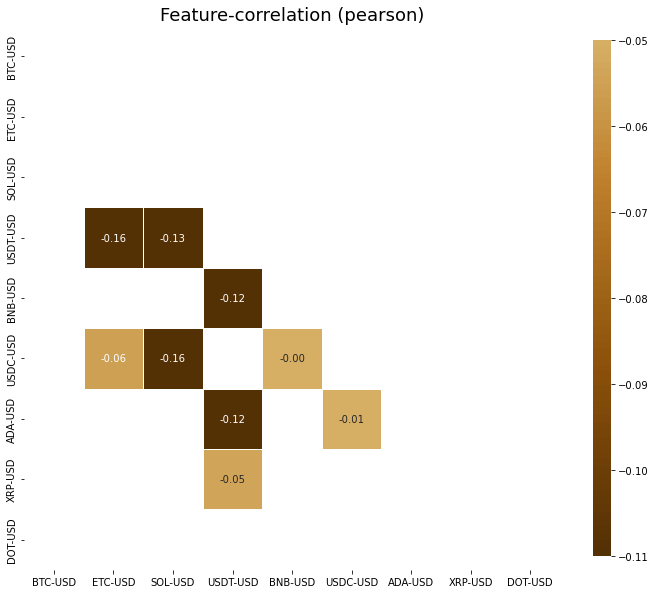

In [10]:
klib.corr_plot(combined, split='neg',) # displaying only negative correlations

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

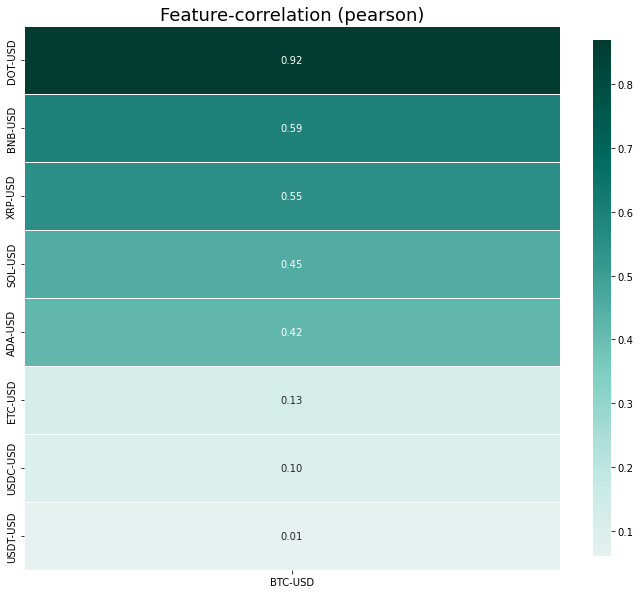

In [11]:
klib.corr_plot(combined,target='BTC-USD') # displaying only correlations with target variable

<AxesSubplot:xlabel='DOT-USD', ylabel='Density'>

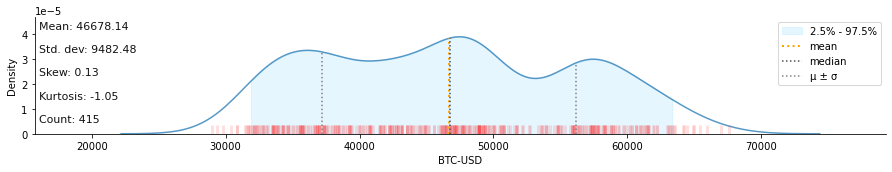

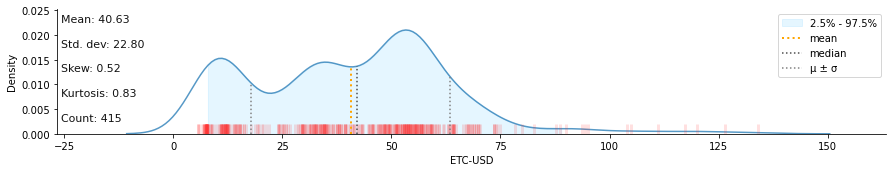

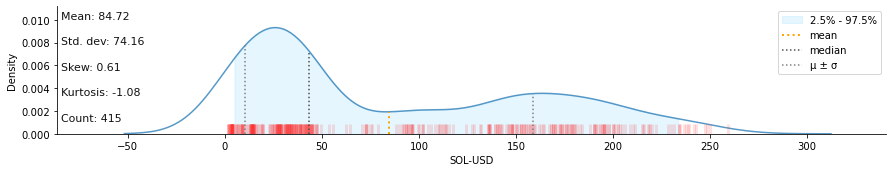

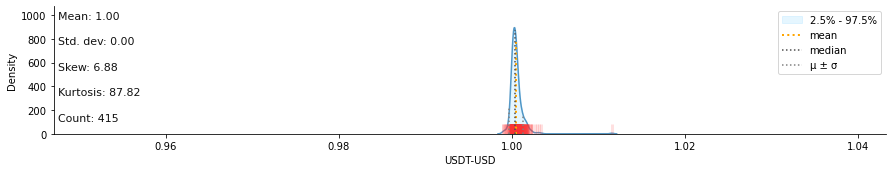

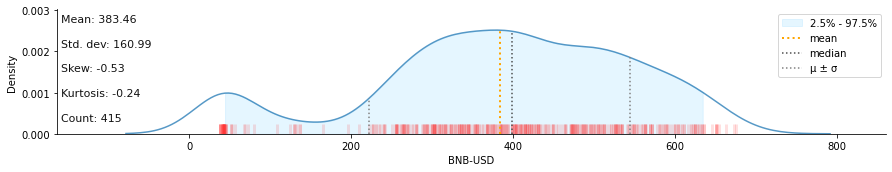

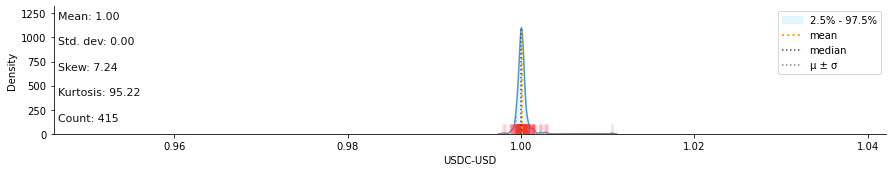

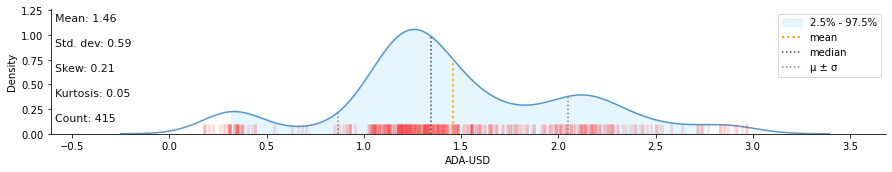

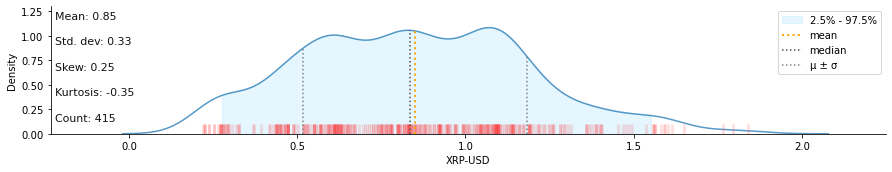

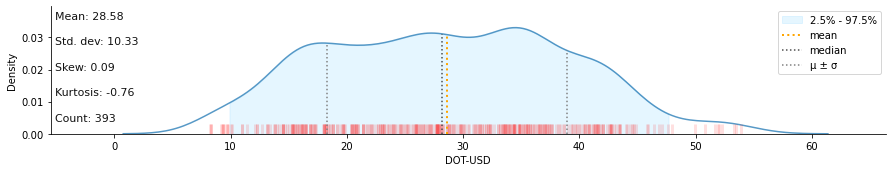

In [12]:
klib.dist_plot(combined) # default representation of a distribution plot, other settings include fill_range, histogram, ...